# 5. Conventional Baseline Models

In [2]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Function to perform Linear Regression with Cross-Validation
def perform_linear_regression_cv(df):
    X = df.drop(columns=['Price'])  # Features
    y = df['Price']  # Target variable

    # Linear Regression with Cross-Validation
    linear_reg = LinearRegression()
    mse_scores = -cross_val_score(linear_reg, X, y, cv=5, scoring='neg_mean_squared_error')
    return mse_scores.mean()

# Function to perform XGBoost Regression with Cross-Validation
def perform_xgboost_regression_cv(df):
    X = df.drop(columns=['Price'])  # Features
    y = df['Price']  # Target variable

    # Best parameters for XGBoost Regression
    best_params = {
        'learning_rate': 0.1,
        'max_depth': 3,
        'n_estimators': 100,
        'subsample': 0.8
    }

    # XGBoost Regression with Cross-Validation
    xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', **best_params)
    mse_scores = -cross_val_score(xgb_reg, X, y, cv=5, scoring='neg_mean_squared_error')
    return mse_scores.mean()

# Function to perform Random Forest Regression with Cross-Validation
def perform_random_forest_regression_cv(df):
    X = df.drop(columns=['Price'])  # Features
    y = df['Price']  # Target variable

    # Random Forest Regression with Cross-Validation
    rf_reg = RandomForestRegressor(random_state=42)
    mse_scores = -cross_val_score(rf_reg, X, y, cv=5, scoring='neg_mean_squared_error')
    return mse_scores.mean()

# Function to perform Neural Network Regression with Cross-Validation
def perform_neural_network_regression_cv(df):
    X = df.drop(columns=['Price'])  # Features
    y = df['Price']  # Target variable
    
    # Define the neural network architecture
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[X.shape[1]]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Define K-fold cross-validation
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    mse_scores = []
    
    # Perform K-fold cross-validation
    for train_idx, val_idx in kfold.split(X):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
        
        # Train the model
        model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
        
        # Evaluate the model on the validation set
        val_loss = model.evaluate(X_val, y_val, verbose=0)
        mse_scores.append(val_loss)
    
    return np.mean(mse_scores)

# Folder containing individual CSV files
folder_path = "Full/norm"

# Function to perform data preprocessing and feature engineering
from category_encoders import TargetEncoder

# Function to preprocess data with enhanced feature engineering and encoding
def preprocess_data(df):


    # Convert 'Date' column to datetime and extract useful features
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Quarter'] = df['Date'].dt.quarter
        
    # Drop original 'Date' and 'Quarter_Date' columns
    df.drop(columns=['Date'], inplace=True)


    # Use target encoding for the 'Stock' column
    encoder = TargetEncoder()
    df['Stock_Encoded'] = encoder.fit_transform(df['Stock'], df['Price'])

    # Drop the original 'Stock' column
    df.drop(columns=['Stock'], inplace=True)
    
    return df

# Iterate over CSV files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(folder_path, filename)
        print("Processing file:", filename)

        df = pd.read_csv(file_path)
        
        # Preprocess data
        df = preprocess_data(df)
        
        # Assuming 'Price' is the target column
        if 'Price' in df.columns:
            # Perform Linear Regression with Cross-Validation
            linear_reg_cv_mse = perform_linear_regression_cv(df)
            print("Cross-Validation MSE (Linear Regression):", linear_reg_cv_mse)
            
            # Perform XGBoost Regression with Cross-Validation
            xgb_reg_cv_mse = perform_xgboost_regression_cv(df)
            print("Cross-Validation MSE (XGBoost Regression):", xgb_reg_cv_mse)
            
            # Perform Random Forest Regression with Cross-Validation
            rf_reg_cv_mse = perform_random_forest_regression_cv(df)
            print("Cross-Validation MSE (Random Forest Regression):", rf_reg_cv_mse)
            
            # Perform Neural Network Regression with Cross-Validation
            nn_reg_cv_mse = perform_neural_network_regression_cv(df)
            print("Cross-Validation MSE (Neural Network Regression):", nn_reg_cv_mse)
        else:
            print("Error: 'Price' column not found in", filename)


Processing file: Normalized_Dataset.csv
Cross-Validation MSE (Linear Regression): 0.04456079872489406
Cross-Validation MSE (XGBoost Regression): 0.013872996899366405
Cross-Validation MSE (Random Forest Regression): 0.02156963270469687


D:\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Cross-Validation MSE (Neural Network Regression): 0.10291266236454248
Processing file: Standardized_Dataset.csv
Cross-Validation MSE (Linear Regression): 2.2586248877078337
Cross-Validation MSE (XGBoost Regression): 0.7030330656280829
Cross-Validation MSE (Random Forest Regression): 1.079216084709964


D:\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Cross-Validation MSE (Neural Network Regression): 0.8428588926792144


Summary Statistics:
              Sales  Gross Income          EBIT        EBITDA    Net Income  \
count  1.003000e+03  1.003000e+03  1.003000e+03  1.003000e+03  1.003000e+03   
mean   1.416835e-17 -3.542087e-18 -2.833670e-17  3.542087e-18  1.062626e-17   
std    1.000499e+00  1.000499e+00  1.000499e+00  1.000499e+00  1.000499e+00   
min   -4.671059e-01 -1.169493e+00 -2.019243e+01 -2.398625e+01 -1.902695e+01   
25%   -3.527330e-01 -6.775436e-01 -2.032467e-03 -1.164093e-01 -3.024273e-02   
50%   -2.351121e-01 -3.637279e-01  2.289201e-02 -5.033629e-02 -1.350775e-02   
75%    1.774727e-01  4.217280e-01  9.763219e-02  1.539303e-01  4.605522e-02   
max    2.067377e+01  1.435754e+01  7.383275e-01  1.358369e+00  1.866379e+01   

       Cash & Short-Term Investments  Total Assets    Total Debt  \
count                   1.003000e+03  1.003000e+03  1.003000e+03   
mean                   -4.250505e-17 -7.084175e-18 -7.084175e-18   
std                     1.000499e+00  1.000499e+00  1.000499e+00

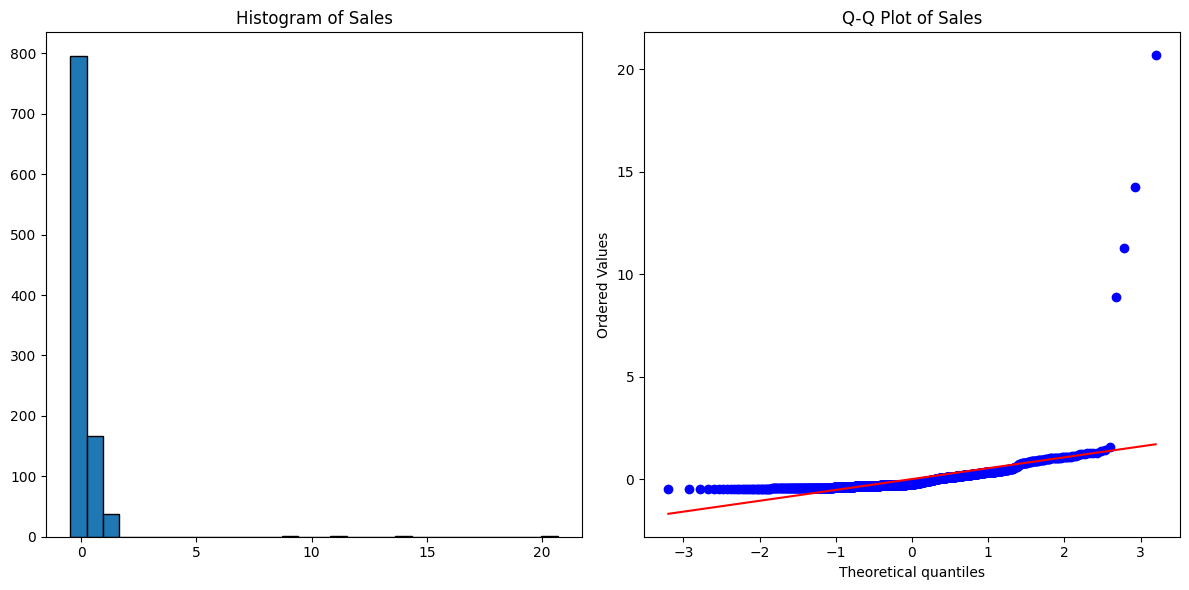

Shapiro-Wilk Test for Sales:
Statistic: 0.2847, p-value: 0.0000
Sales: Sample does not look Gaussian (reject H0)


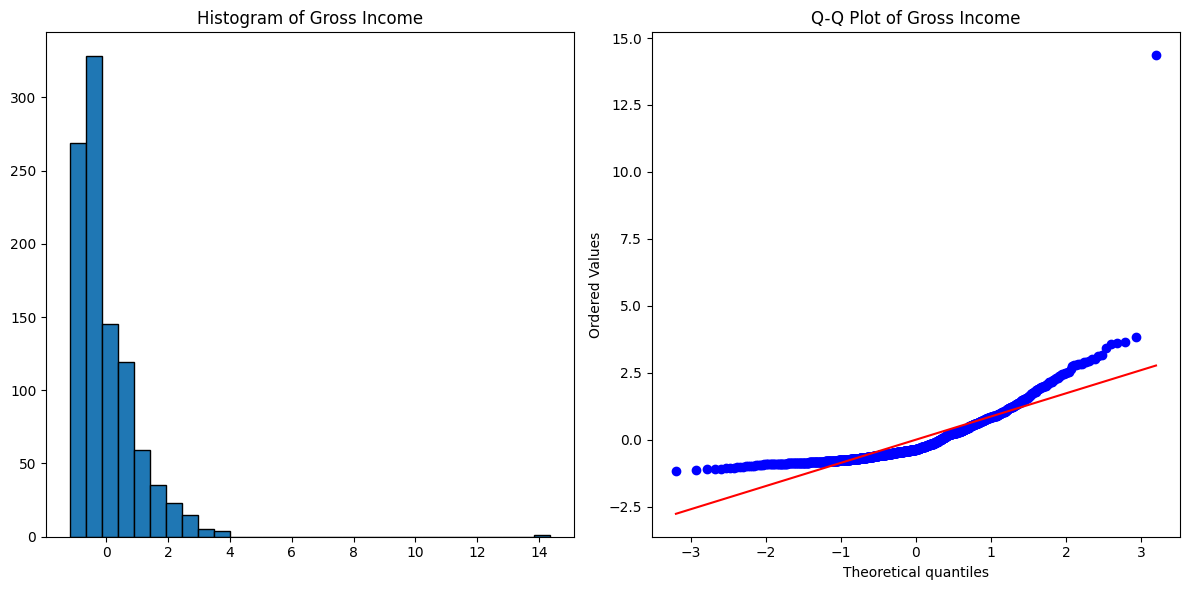

Shapiro-Wilk Test for Gross Income:
Statistic: 0.7495, p-value: 0.0000
Gross Income: Sample does not look Gaussian (reject H0)


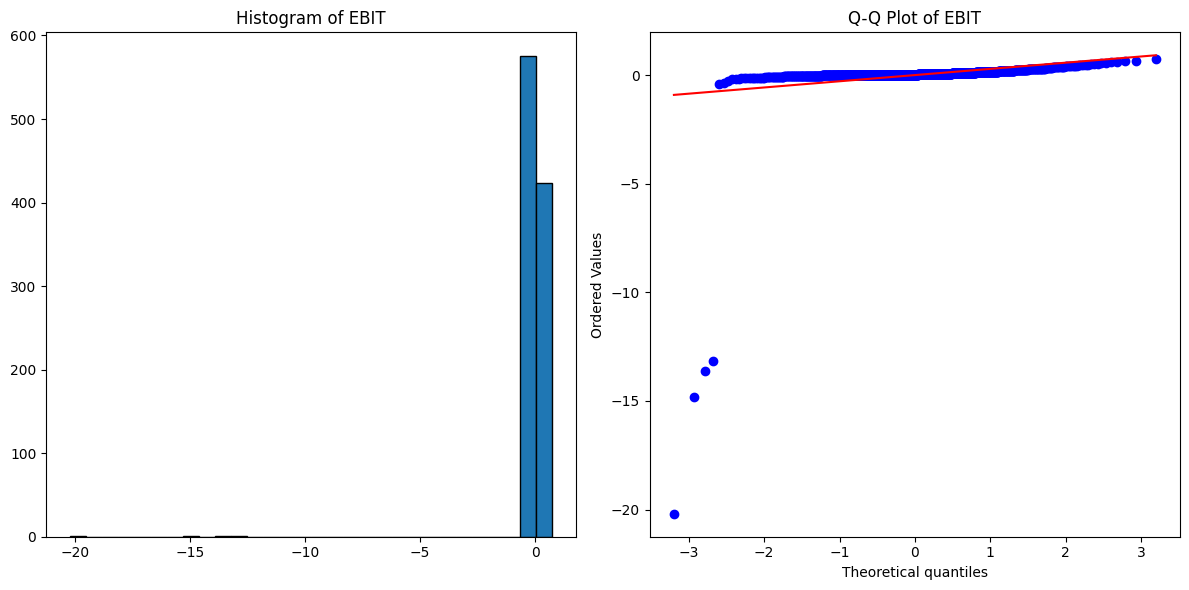

Shapiro-Wilk Test for EBIT:
Statistic: 0.0840, p-value: 0.0000
EBIT: Sample does not look Gaussian (reject H0)


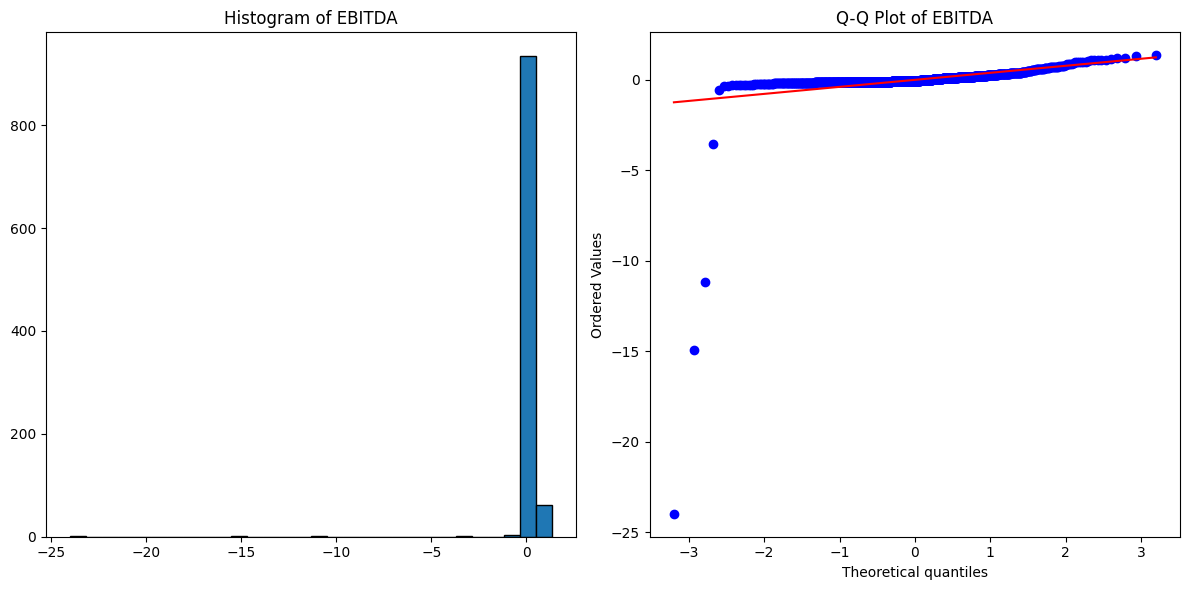

Shapiro-Wilk Test for EBITDA:
Statistic: 0.1549, p-value: 0.0000
EBITDA: Sample does not look Gaussian (reject H0)


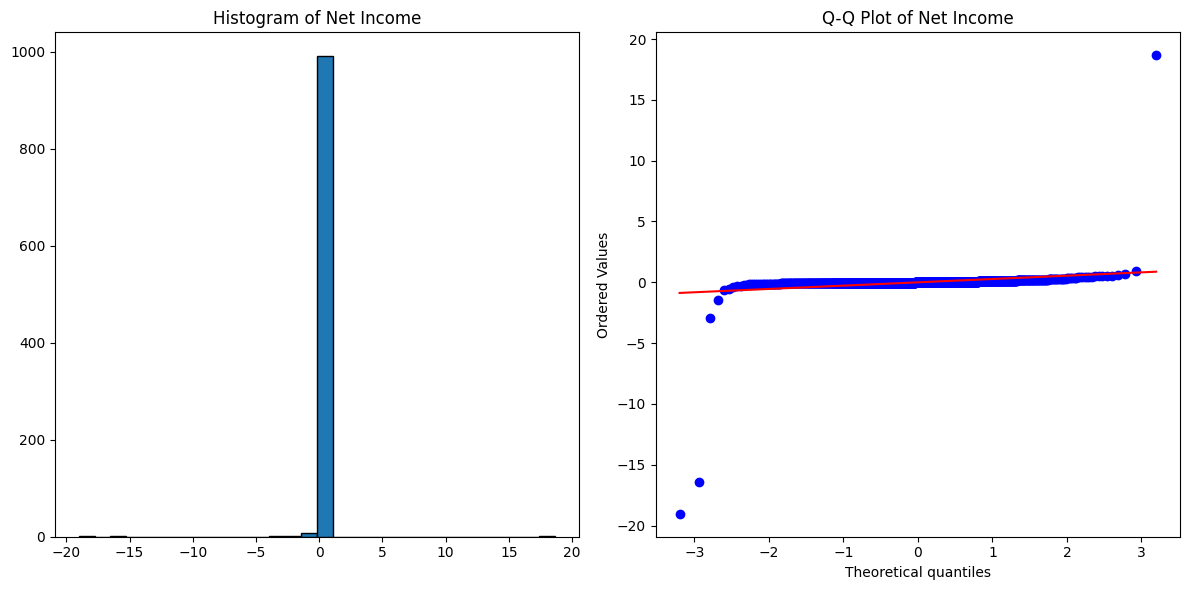

Shapiro-Wilk Test for Net Income:
Statistic: 0.0793, p-value: 0.0000
Net Income: Sample does not look Gaussian (reject H0)


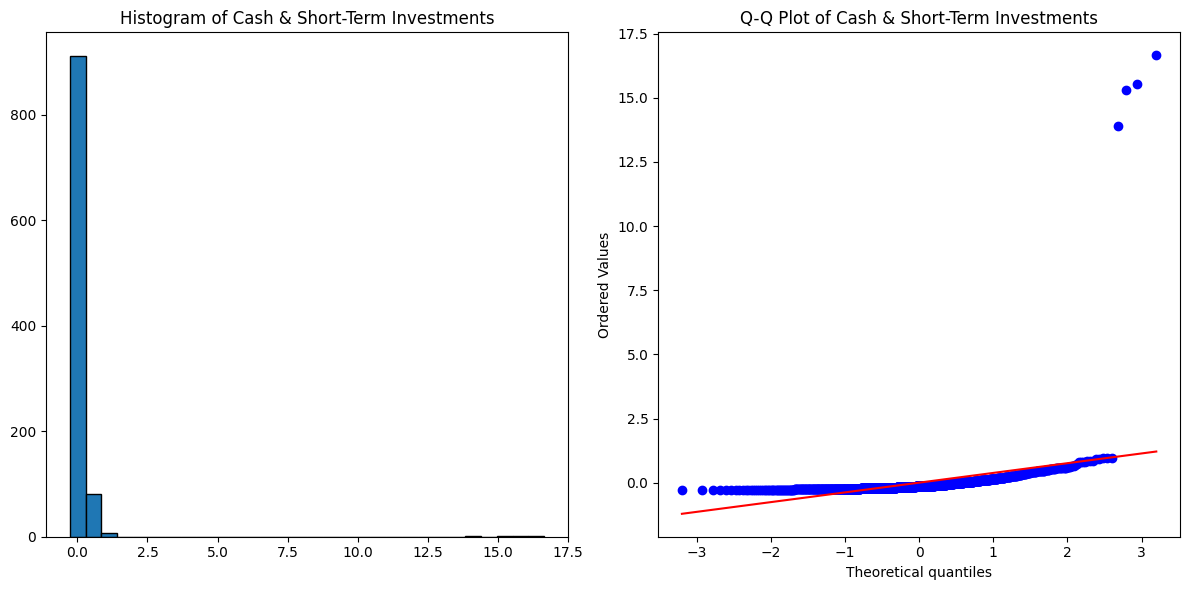

Shapiro-Wilk Test for Cash & Short-Term Investments:
Statistic: 0.1465, p-value: 0.0000
Cash & Short-Term Investments: Sample does not look Gaussian (reject H0)


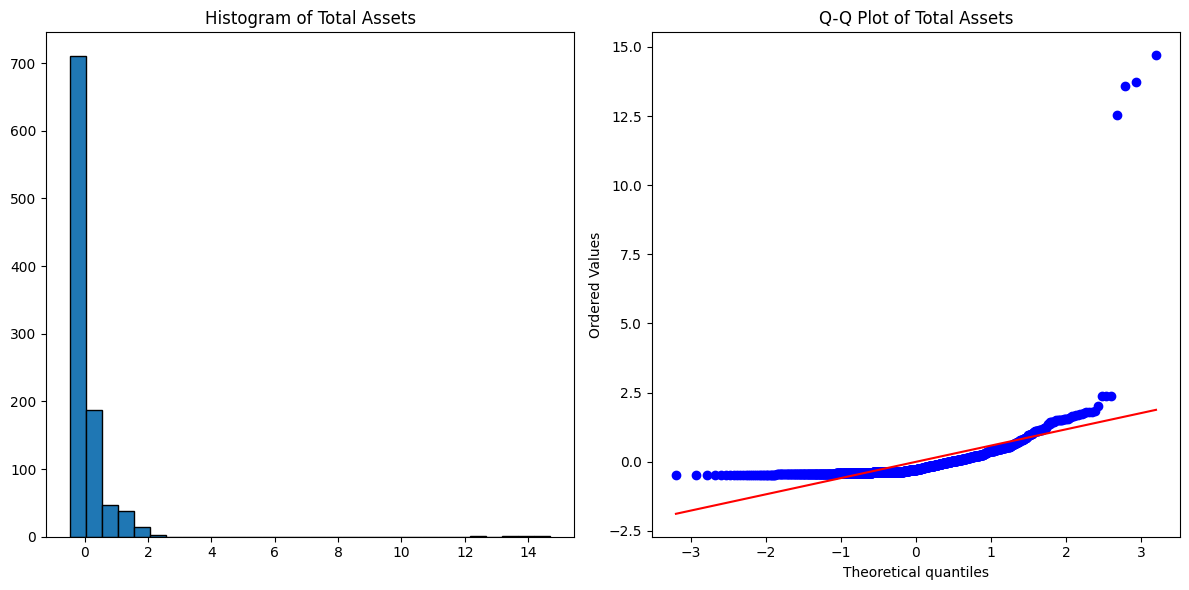

Shapiro-Wilk Test for Total Assets:
Statistic: 0.3472, p-value: 0.0000
Total Assets: Sample does not look Gaussian (reject H0)


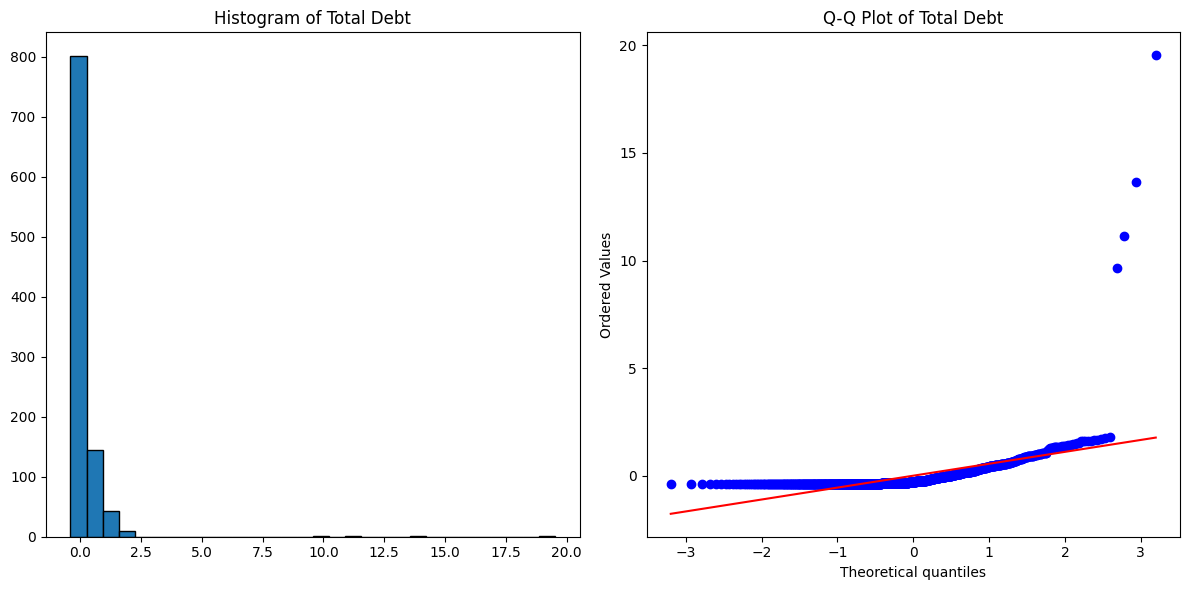

Shapiro-Wilk Test for Total Debt:
Statistic: 0.3099, p-value: 0.0000
Total Debt: Sample does not look Gaussian (reject H0)


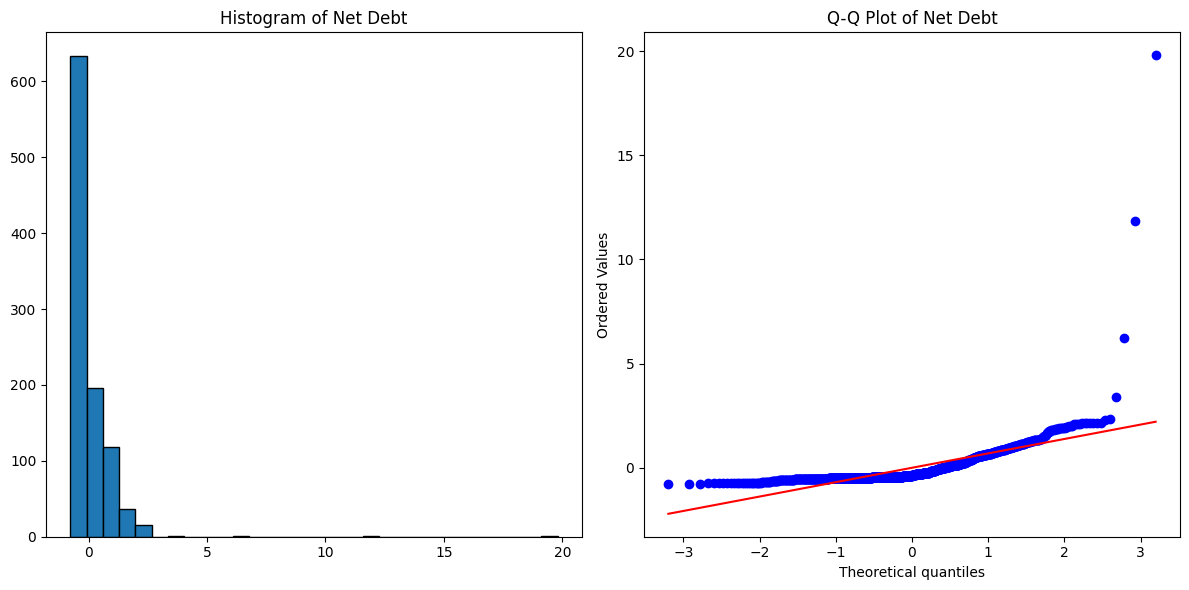

Shapiro-Wilk Test for Net Debt:
Statistic: 0.4807, p-value: 0.0000
Net Debt: Sample does not look Gaussian (reject H0)


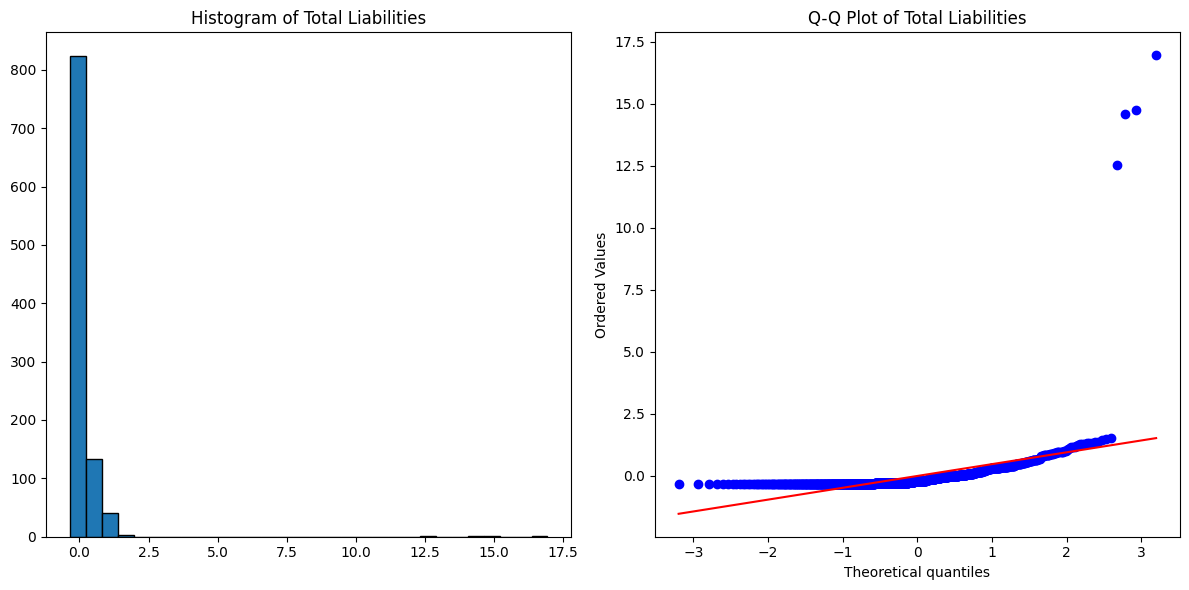

Shapiro-Wilk Test for Total Liabilities:
Statistic: 0.2300, p-value: 0.0000
Total Liabilities: Sample does not look Gaussian (reject H0)


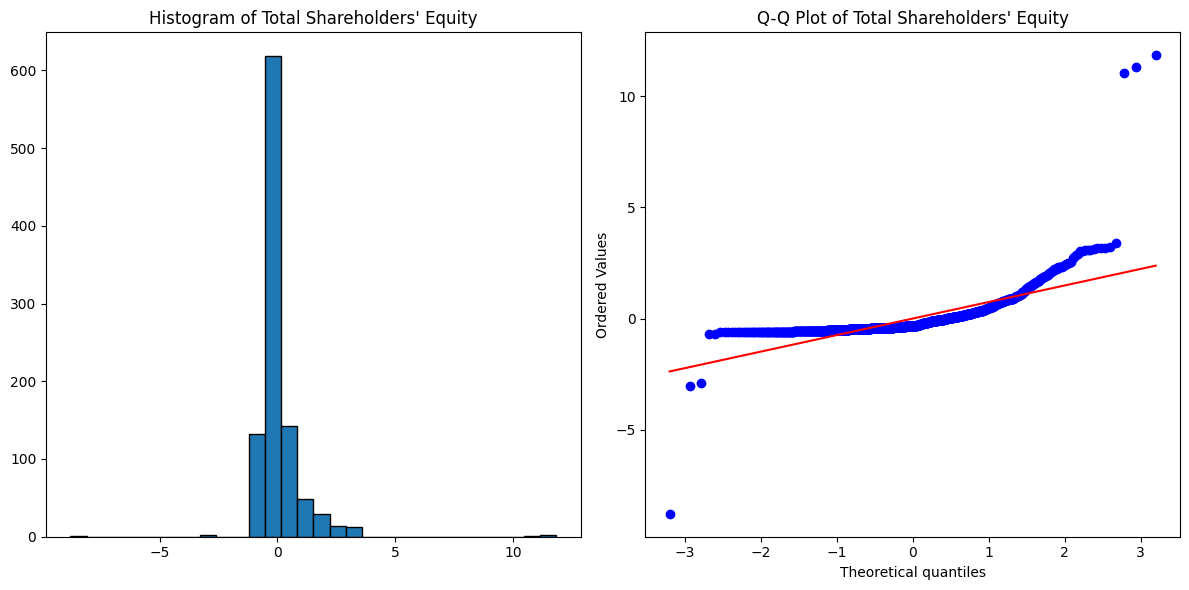

Shapiro-Wilk Test for Total Shareholders' Equity:
Statistic: 0.5571, p-value: 0.0000
Total Shareholders' Equity: Sample does not look Gaussian (reject H0)


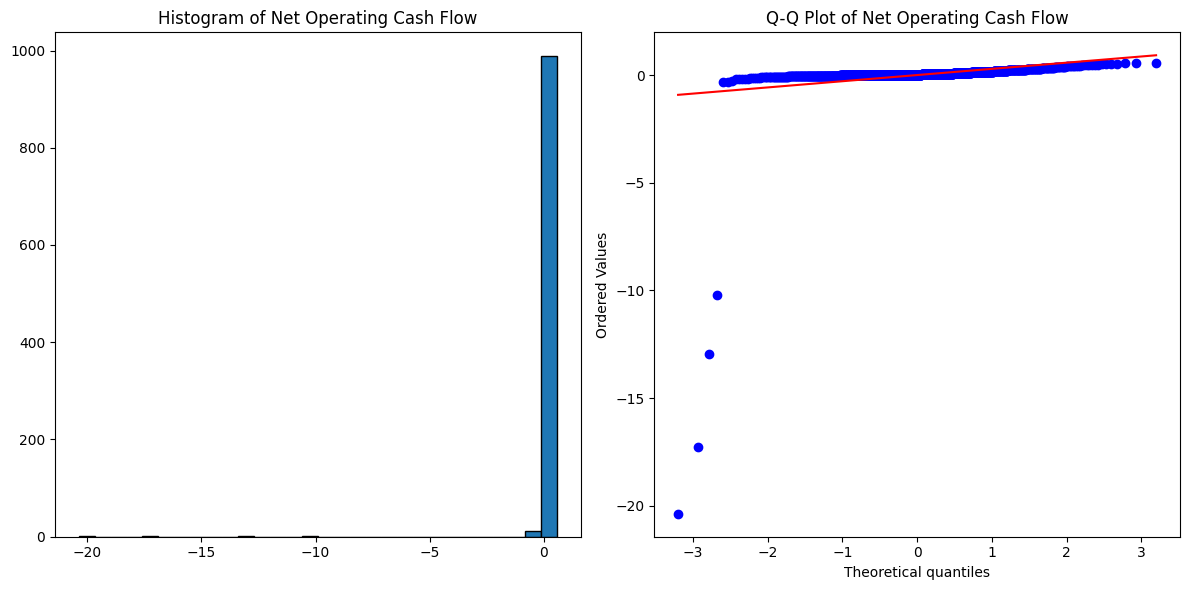

Shapiro-Wilk Test for Net Operating Cash Flow:
Statistic: 0.0854, p-value: 0.0000
Net Operating Cash Flow: Sample does not look Gaussian (reject H0)


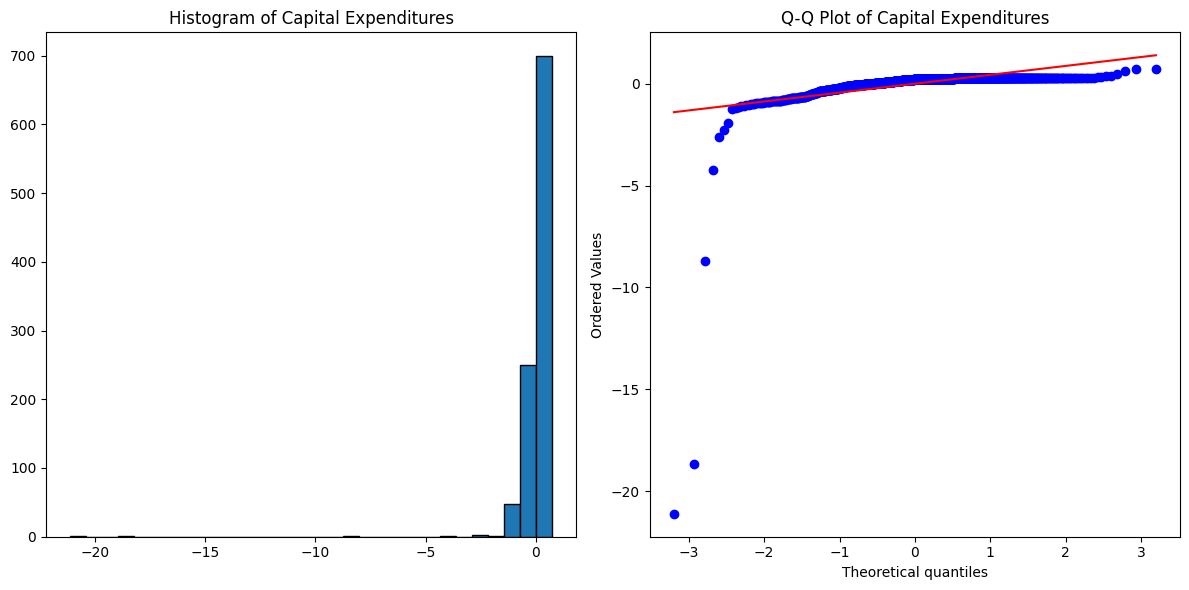

Shapiro-Wilk Test for Capital Expenditures:
Statistic: 0.1946, p-value: 0.0000
Capital Expenditures: Sample does not look Gaussian (reject H0)


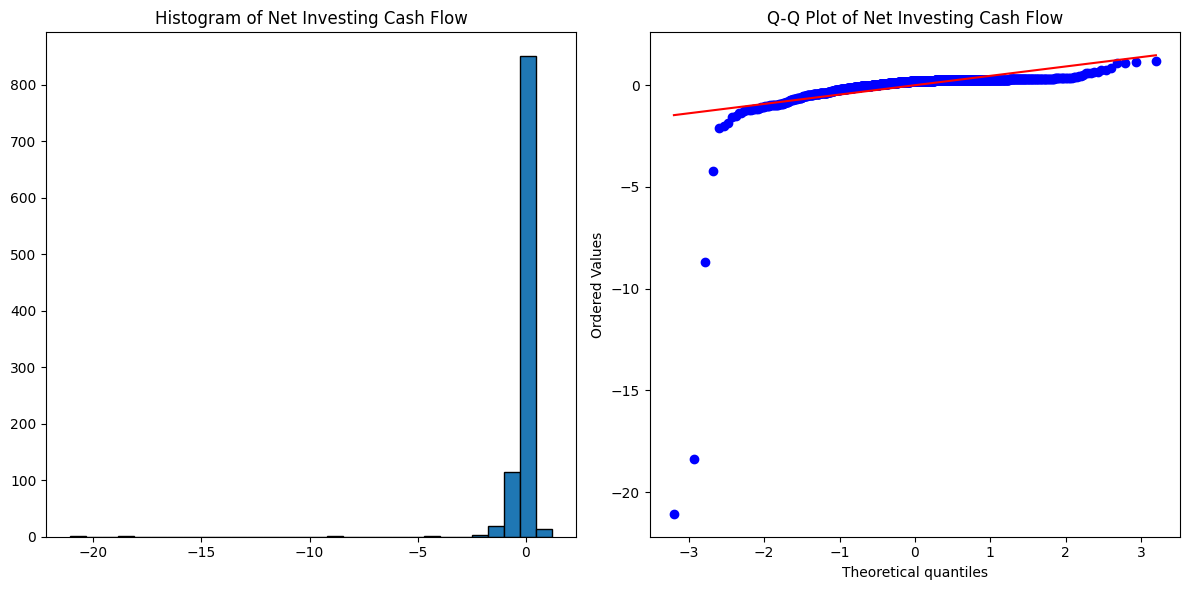

Shapiro-Wilk Test for Net Investing Cash Flow:
Statistic: 0.2157, p-value: 0.0000
Net Investing Cash Flow: Sample does not look Gaussian (reject H0)


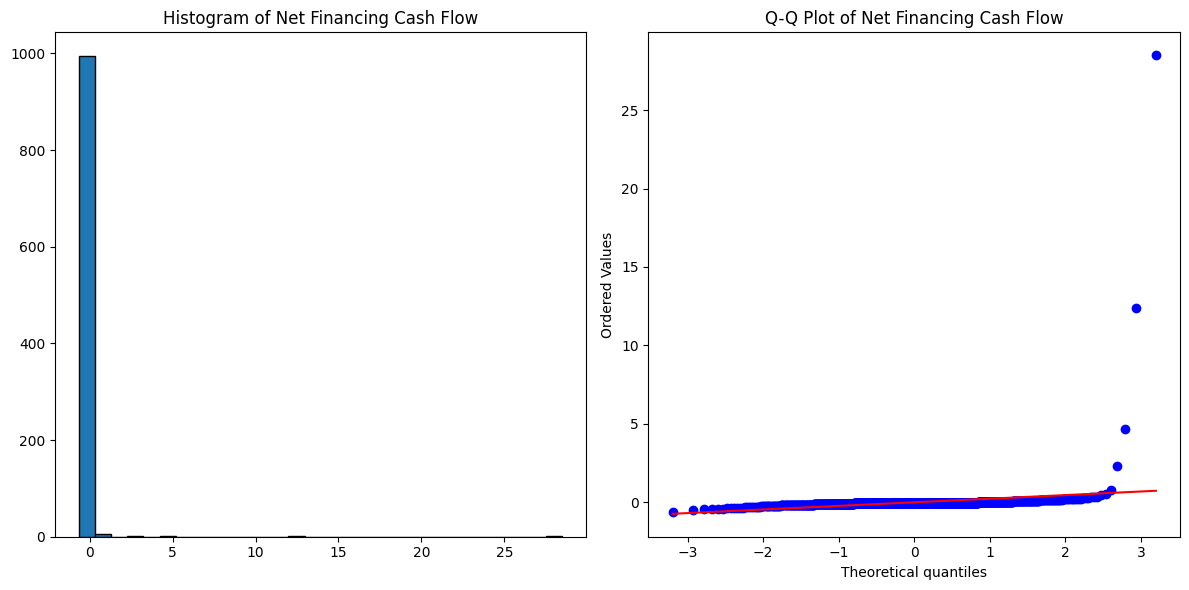

Shapiro-Wilk Test for Net Financing Cash Flow:
Statistic: 0.0558, p-value: 0.0000
Net Financing Cash Flow: Sample does not look Gaussian (reject H0)


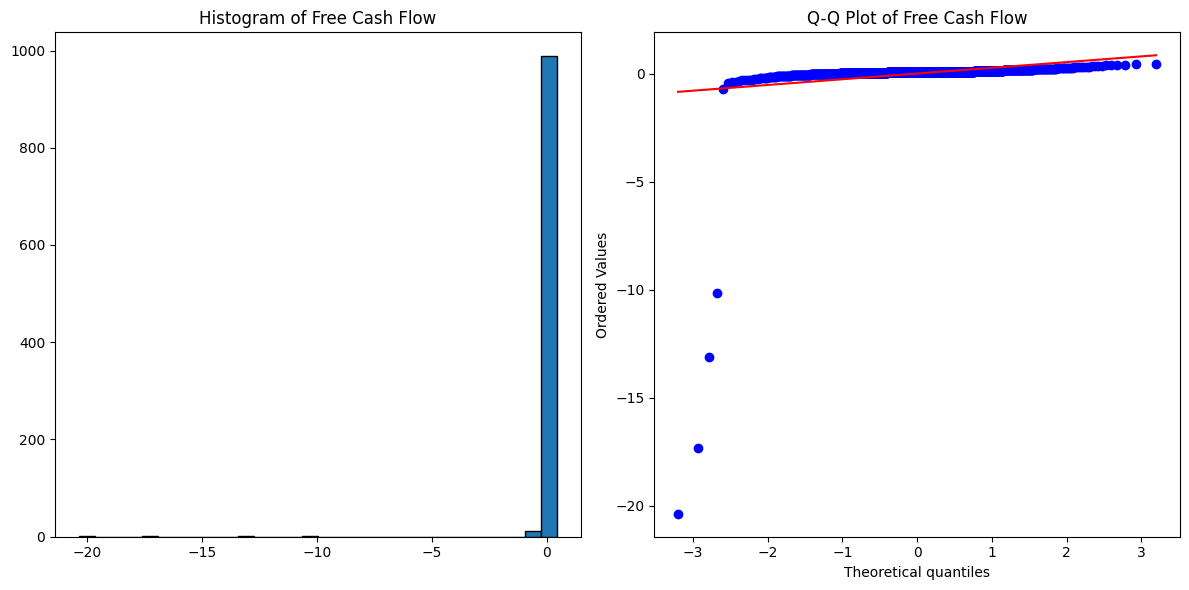

Shapiro-Wilk Test for Free Cash Flow:
Statistic: 0.0725, p-value: 0.0000
Free Cash Flow: Sample does not look Gaussian (reject H0)


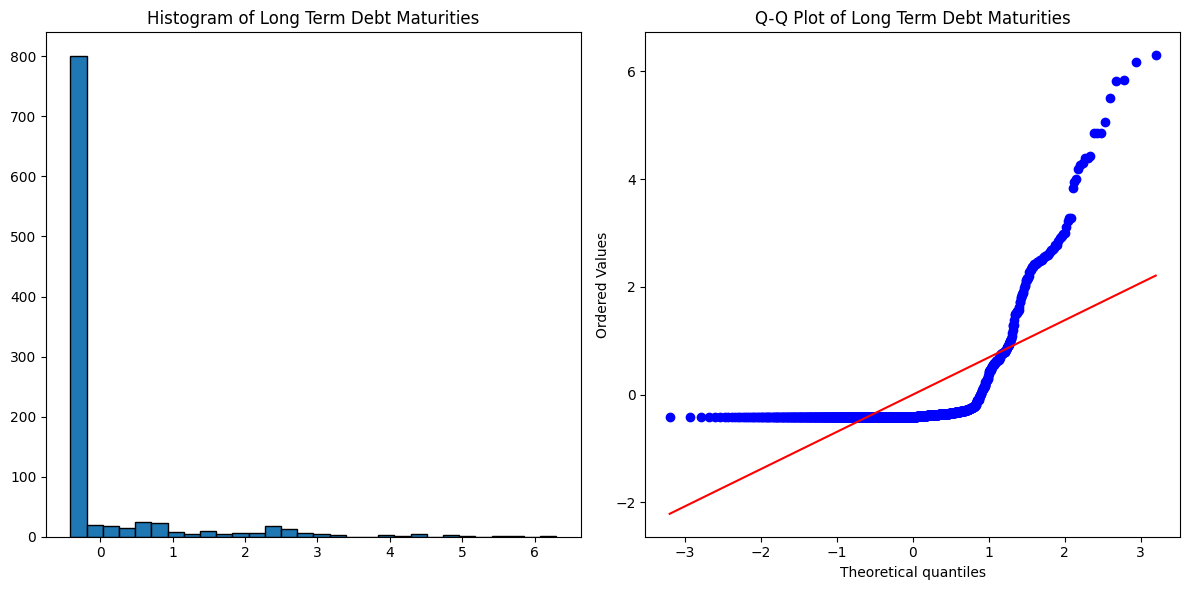

Shapiro-Wilk Test for Long Term Debt Maturities:
Statistic: 0.4760, p-value: 0.0000
Long Term Debt Maturities: Sample does not look Gaussian (reject H0)


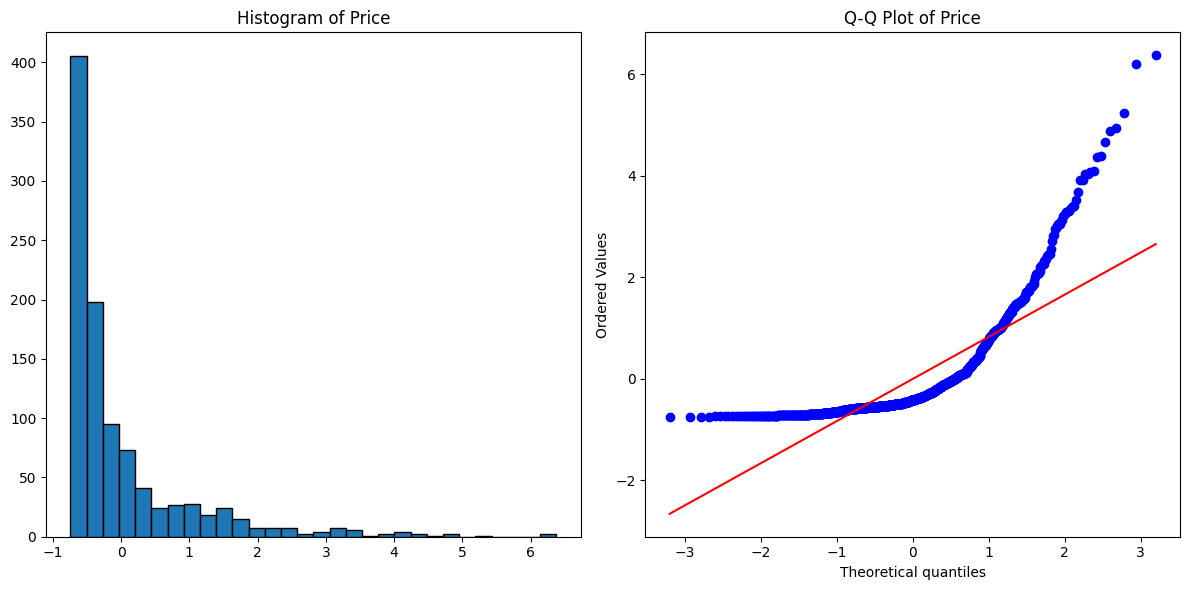

Shapiro-Wilk Test for Price:
Statistic: 0.6869, p-value: 0.0000
Price: Sample does not look Gaussian (reject H0)


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Read data from CSV
df = pd.read_csv('Full/norm/Standardized_Dataset.csv')


# Step 2: Filter numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_numerical = df[numerical_columns]

# Step 3: Summary statistics
summary_stats = df_numerical.describe()
print("Summary Statistics:")
print(summary_stats)

# Step 4: Visual inspection and normality checks for numerical features
for column in df_numerical.columns:
    data = df_numerical[column].values
    
    # Histogram
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(data, bins=30, edgecolor='black')
    plt.title(f'Histogram of {column}')
    
    # Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {column}')
    
    plt.tight_layout()
    plt.show()

    # Shapiro-Wilk test
    stat, p = stats.shapiro(data)

    print(f'Shapiro-Wilk Test for {column}:')
    print(f'Statistic: {stat:.4f}, p-value: {p:.4f}')

    alpha = 0.05
    if p > alpha:
        print(f'{column}: Sample looks Gaussian (fail to reject H0)')
    else:
        print(f'{column}: Sample does not look Gaussian (reject H0)')


In [14]:
import os
import pickle
import pandas as pd
from sklearn.preprocessing import StandardScaler

def standardize_and_save(input_file, output_directory):
    # Load the CSV file into a DataFrame
    df = pd.read_csv(input_file)

    # Select all numerical columns for standardization
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

    # Standardize numerical columns
    scaler = StandardScaler()
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

    # Specify the directory to save the file
    os.makedirs(output_directory, exist_ok=True)  # Create the directory if it doesn't exist

    # Save the standardized DataFrame to a new CSV file
    output_file = os.path.join(output_directory, 'AZ.csv')
    df.to_csv(output_file, index=False)

    # Save the scaler object using pickle
    scaler_file = os.path.join(output_directory, 'FULLNORMscaler.pkl')
    with open(scaler_file, 'wb') as f:
        pickle.dump(scaler, f)

    # Print confirmation message
    print("Standardization complete. The standardized data has been saved to 'AZ.csv' and the scaler object to 'FULLNORMscaler.pkl' in the '{}' directory.".format(output_directory))

# Example usage:
if __name__ == "__main__":
    input_file = 'Full/norm/AB.csv'
    output_directory = 'Full/norm'
    standardize_and_save(input_file, output_directory)


Standardization complete. The standardized data has been saved to 'AZ.csv' and the scaler object to 'FULLNORMscaler.pkl' in the 'Full/norm' directory.


The following code is to separate the days of historical prices with day of release the report. Creating new datasets for each day after release of the reports during 1 week.

In [4]:
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler

# Path to the folder containing financial data CSV
financial_data_folder = 'dayTest2'
week = 'dayTest/week'
os.makedirs(financial_data_folder, exist_ok=True)  # Create the directory if it doesn't exist
os.makedirs(week, exist_ok=True)  # Create the directory if it doesn't exist

# Path to the folder containing stock price CSVs
stock_price_folder = 'CleanedHisPrices'

# Read financial data CSV
financial_data = pd.read_csv(os.path.join('Full/Normalized_Dataset.csv'))

# Assume the date column in financial_data is named 'Quarter_Date'
# Let's rename it to 'Date' for consistency with stock price data
financial_data.rename(columns={'Date': 'Quarter_Date'}, inplace=True)

# Loop through each day after the release of the quarter report
for day_offset in range(1, 8):  # from one day after to seven days after
    # Shift the 'Quarter_Date' by the current day offset
    financial_data['Date'] = pd.to_datetime(financial_data['Quarter_Date']) + pd.DateOffset(days=day_offset)

    # Create an empty DataFrame to store merged data
    merged_data = pd.DataFrame()

    # Iterate through each company's stock price CSV
    for csv_file in os.listdir(stock_price_folder):
        if csv_file.endswith('.csv'):
            company_name = os.path.splitext(csv_file)[0]

            # Read stock price data
            stock_price_data = pd.read_csv(os.path.join(stock_price_folder, csv_file))

            # Check if 'Date' column exists in stock_price_data
            if 'Date' not in stock_price_data.columns:
                print(f"Warning: 'Date' column not found in {csv_file}. Skipping.")
                continue

            # Convert 'Date' column to datetime data type
            stock_price_data['Date'] = pd.to_datetime(stock_price_data['Date'])

            # Check and convert 'Stock' column data type if necessary
            if 'Stock' in financial_data.columns and 'Stock' in stock_price_data.columns:
                if not pd.api.types.is_string_dtype(financial_data['Stock']):
                    financial_data['Stock'] = financial_data['Stock'].astype(str)

                if not pd.api.types.is_string_dtype(stock_price_data['Stock']):
                    stock_price_data['Stock'] = stock_price_data['Stock'].astype(str)

            # Merge financial data with stock price data based on "Date" and "Stock"
            merged_data_company = pd.merge(financial_data, stock_price_data, on=['Date', 'Stock'])

            # Concatenate with previously merged data
            merged_data = pd.concat([merged_data, merged_data_company], ignore_index=True)

    # Save the merged data to a CSV file in the financial data folder
    merged_data.to_csv(os.path.join(week, f'Day{day_offset}AfterRelease.csv'), index=False)


def process_csv_folder(folder_path):
    # Iterate through files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith(".csv"):
            # Read CSV file
            filepath = os.path.join(folder_path, filename)
            df = pd.read_csv(filepath)

            # Drop specified columns
            columns_to_drop = ['CVol', 'Change', '% Change', '% Return', 'Total Return (Gross)', 
                               'Cumulative Return %', 'Open', 'High', 'Low', 'Cumulative Change %']
            df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

            # Rename 'Price_y' column to 'Price'
            df.rename(columns={'Price_y': 'Price'}, inplace=True)

            # Normalize the 'Price' column
            if 'Price' in df.columns:
                scaler = MinMaxScaler()
                df['Price'] = scaler.fit_transform(df[['Price']])

            # Save to CSV
            new_filename = os.path.splitext(filename)[0] + ".csv"
            new_filepath = os.path.join(folder_path, new_filename)
            df.to_csv(new_filepath, index=False)

            print(f"Processed file saved as: {new_filepath}")

# Example usage:
folder_path = "dayTest/week"
process_csv_folder(folder_path)

print("Done, new CSVs of weeks created")


Processed file saved as: dayTest/week\Day1AfterRelease.csv
Processed file saved as: dayTest/week\Day2AfterRelease.csv
Processed file saved as: dayTest/week\Day3AfterRelease.csv
Processed file saved as: dayTest/week\Day4AfterRelease.csv
Processed file saved as: dayTest/week\Day5AfterRelease.csv
Processed file saved as: dayTest/week\Day6AfterRelease.csv
Processed file saved as: dayTest/week\Day7AfterRelease.csv
Processed file saved as: dayTest/week\SameDay.csv
Done, new CSVs of weeks created


In [7]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Function to perform Linear Regression with Cross-Validation
def perform_linear_regression_cv(df):
    X = df.drop(columns=['Price'])  # Features
    y = df['Price']  # Target variable

    # Linear Regression with Cross-Validation
    linear_reg = LinearRegression()
    mse_scores = -cross_val_score(linear_reg, X, y, cv=5, scoring='neg_mean_squared_error')
    return mse_scores.mean()

# Function to perform XGBoost Regression with Cross-Validation
def perform_xgboost_regression_cv(df):
    X = df.drop(columns=['Price'])  # Features
    y = df['Price']  # Target variable

    # Best parameters for XGBoost Regression
    best_params = {
        'learning_rate': 0.1,
        'max_depth': 3,
        'n_estimators': 100,
        'subsample': 0.8
    }

    # XGBoost Regression with Cross-Validation
    xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', **best_params)
    mse_scores = -cross_val_score(xgb_reg, X, y, cv=5, scoring='neg_mean_squared_error')
    return mse_scores.mean()

# Function to perform Random Forest Regression with Cross-Validation
def perform_random_forest_regression_cv(df):
    X = df.drop(columns=['Price'])  # Features
    y = df['Price']  # Target variable

    # Random Forest Regression with Cross-Validation
    rf_reg = RandomForestRegressor(random_state=42)
    mse_scores = -cross_val_score(rf_reg, X, y, cv=5, scoring='neg_mean_squared_error')
    return mse_scores.mean()

# Function to perform Neural Network Regression with Cross-Validation
def perform_neural_network_regression_cv(df):
    X = df.drop(columns=['Price'])  # Features
    y = df['Price']  # Target variable
    
    # Define the neural network architecture
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[X.shape[1]]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Define K-fold cross-validation
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    mse_scores = []
    
    # Perform K-fold cross-validation
    for train_idx, val_idx in kfold.split(X):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
        
        # Train the model
        model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
        
        # Evaluate the model on the validation set
        val_loss = model.evaluate(X_val, y_val, verbose=0)
        mse_scores.append(val_loss)
    
    return np.mean(mse_scores)

# Folder containing individual CSV files
folder_path = "dayTest/week"

# Function to perform data preprocessing and feature engineering
from category_encoders import TargetEncoder

# Function to preprocess data with enhanced feature engineering and encoding
def preprocess_data(df):


    # Convert 'Date' column to datetime and extract useful features
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Quarter'] = df['Date'].dt.quarter
        # Extract quarters from 'Quarter_Date' column if available
    # if 'Quarter_Date' in df.columns:
    #     df['Quarter'] = pd.to_datetime(df['Quarter_Date']).dt.quarter
        
    # Drop original 'Date' and 'Quarter_Date' columns
    df.drop(columns=['Date', 'Quarter_Date'], inplace=True)
    if 'Price_x' in df.columns:
        df.drop(columns=['Price_x'], inplace=True)


    # Use target encoding for the 'Stock' column
    encoder = TargetEncoder()
    df['Stock_Encoded'] = encoder.fit_transform(df['Stock'], df['Price'])

    # Drop the original 'Stock' column
    df.drop(columns=['Stock'], inplace=True)
    
    return df

# Iterate over CSV files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(folder_path, filename)
        print("Processing file:", filename)

        df = pd.read_csv(file_path)
        
        # Preprocess data
        df = preprocess_data(df)
        
        # Assuming 'Price' is the target column
        if 'Price' in df.columns:
            # Perform Linear Regression with Cross-Validation
            linear_reg_cv_mse = perform_linear_regression_cv(df)
            print("Cross-Validation MSE (Linear Regression):", linear_reg_cv_mse)
            
            # Perform XGBoost Regression with Cross-Validation
            xgb_reg_cv_mse = perform_xgboost_regression_cv(df)
            print("Cross-Validation MSE (XGBoost Regression):", xgb_reg_cv_mse)
            
            # Perform Random Forest Regression with Cross-Validation
            rf_reg_cv_mse = perform_random_forest_regression_cv(df)
            print("Cross-Validation MSE (Random Forest Regression):", rf_reg_cv_mse)
            
            # Perform Neural Network Regression with Cross-Validation
            nn_reg_cv_mse = perform_neural_network_regression_cv(df)
            print("Cross-Validation MSE (Neural Network Regression):", nn_reg_cv_mse)
        else:
            print("Error: 'Price' column not found in", filename)


Processing file: Day1AfterRelease.csv
Cross-Validation MSE (Linear Regression): 0.04619669945871799
Cross-Validation MSE (XGBoost Regression): 0.017453552661570004
Cross-Validation MSE (Random Forest Regression): 0.01603212456997645


D:\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Cross-Validation MSE (Neural Network Regression): 0.17882112860679628
Processing file: Day2AfterRelease.csv
Cross-Validation MSE (Linear Regression): 0.05981005357504857
Cross-Validation MSE (XGBoost Regression): 0.018661778141239337
Cross-Validation MSE (Random Forest Regression): 0.014374106324998193


D:\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Cross-Validation MSE (Neural Network Regression): 0.4360215462744236
Processing file: Day3AfterRelease.csv
Cross-Validation MSE (Linear Regression): 0.011800276905463317
Cross-Validation MSE (XGBoost Regression): 0.02217251701343292
Cross-Validation MSE (Random Forest Regression): 0.019389331549909093


D:\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Cross-Validation MSE (Neural Network Regression): 0.09488301649689675
Processing file: Day4AfterRelease.csv
Cross-Validation MSE (Linear Regression): 0.015320936859332562
Cross-Validation MSE (XGBoost Regression): 0.02179978082473879
Cross-Validation MSE (Random Forest Regression): 0.019076644719953146


D:\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Cross-Validation MSE (Neural Network Regression): 0.024576515331864356
Processing file: Day5AfterRelease.csv
Cross-Validation MSE (Linear Regression): 0.23574996204042856
Cross-Validation MSE (XGBoost Regression): 0.019654211934006405
Cross-Validation MSE (Random Forest Regression): 0.022646086234213027


D:\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Cross-Validation MSE (Neural Network Regression): 0.1811032399535179
Processing file: Day6AfterRelease.csv
Cross-Validation MSE (Linear Regression): 0.09353674332608
Cross-Validation MSE (XGBoost Regression): 0.015869691215021884
Cross-Validation MSE (Random Forest Regression): 0.027966472221255673


D:\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Cross-Validation MSE (Neural Network Regression): 0.12681302465498448
Processing file: Day7AfterRelease.csv
Cross-Validation MSE (Linear Regression): 0.049549150686131
Cross-Validation MSE (XGBoost Regression): 0.013868605918139345
Cross-Validation MSE (Random Forest Regression): 0.02401489804057156


D:\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Cross-Validation MSE (Neural Network Regression): 0.9208872847259044
Processing file: SameDay.csv
Cross-Validation MSE (Linear Regression): 0.04290136999095355
Cross-Validation MSE (XGBoost Regression): 0.016624267595049768
Cross-Validation MSE (Random Forest Regression): 0.015331971038726966


D:\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Cross-Validation MSE (Neural Network Regression): 0.05860852263867855
